general todo, organize class, maybe subclass, some static methods
write documentation

## Import all the relevant Modules 

In [1]:
%matplotlib inline

# adding `Modules/` to the system path
#import sys
#sys.path.insert(0, './Modules/')

#TODO: Rename module shortcuts such as hb into something usefull after development
import Modules.Hubbard_Class as hb
import Modules.Widgets as w
import ipywidgets as widgets
import numpy as np

# Plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')
plt.rcParams.update({'font.size':14})

from ipywidgets import HBox, VBox
import functools

%load_ext autoreload
%autoreload 2
#TODO rename one of the modules folders

TODO: give a good description of the model we're looking at
## Introduction

The following are all markdown todos
* TODO: Check name of basis states
* TODO: Show how basis is created
* #TODO state that total number of basis states is ncr(n,s1) ncr (n,s2)
## The Fock Basis states 

In [2]:
h1 = hb.Hubbard()

In [ ]:
basis_widget = widgets.interactive(h1.show_basis, index=h1.basis_index, n=h1.n, s_up=h1.s_up, s_down=h1.s_down);

display(basis_widget)
#TODO check how to close all widgets, even if they are not already opened

## Hopping Hamiltonian

Markdown Taks:
* TODO: possibly show the simple n=2 analytic calculation for the hubbard molecule in occupation number basis
* TODO: Show the operator nn, na, nb etc


* TODO: Show the operator nn, na, nb etc, show S_a. S_b, S^2

* TODO: Do not show hopping, boring!

In the Widget below one can play around with the number of sites $n$, spin up and spin down states, as well as the interaction strength $U$ and the hopping amplitude $t$ to explore the hamiltonian $H$. Note that only for $n \leq 4$ the complete matrix can be fully displayed.

In [ ]:
#close previous widget to prevent slowing down calculations
#basis_widget.close()

np.set_printoptions(linewidth=150) #set output length, default=75
H_widget = widgets.interactive(h1.Show_H, u=h1.u, t=h1.t, n=h1.n, s_up=h1.s_up, s_down=h1.s_down);
display(H_widget)

# Calculate Eigenenergies 
TODO: for Hu in widget (copy paste)
TODO: for Ht with widget (copy paste) 

In [4]:
# adding `Modules/` to the system path
import sys
sys.path.insert(0, '../Modules/')

from Module_Widgets_and_Sliders import Text_Box, Save_Figure_Button, Click_Save_Figure, set_filename#
#from Widgets import steps_Slider

In [8]:
#H_widget.close()

Hu_widget = widgets.interactive(h1.Plot_Eigvals_Hu, u=h1.u_range, n=h1.n, s_up=h1.s_up, s_down=h1.s_down);

filename = set_filename("Hubbard.pdf")
Save_Figure_Button.on_click(functools.partial(Click_Save_Figure, widget=Hu_widget, name_widget=filename, output=h1.out, path=""))

display(HBox([Save_Figure_Button, filename, h1.out]))
display(Hu_widget)

interactive(children=(FloatRangeSlider(value=(2.0, 7.0), continuous_update=False, description='$U=$', max=40.0…

In [ ]:
Ht_widget = widgets.interactive(h1.Plot_Eigvals_Ht, t=h1.t_range, n=h1.n, s_up=h1.s_up, s_down=h1.s_down);

filename = set_filename("Hubbard.pdf")
Save_Figure_Button.on_click(functools.partial(Click_Save_Figure, widget=Ht_widget, name_widget=filename, output=h1.out, path=""))

display(HBox([Save_Figure_Button, filename, h1.out]))
display(Ht_widget)

In [ ]:
Ht_widget.close()

H_all_widget = widgets.interactive(h1.Plot_Eigvals_H, u=h1.t_range, t=h1.u_range, n=h1.n, s_up=h1.s_up, s_down=h1.s_down);

filename = set_filename("Hubbard.pdf")
Save_Figure_Button.on_click(functools.partial(Click_Save_Figure, widget=H_all_widget, name_widget=filename, output=h1.out, path=""))

display(HBox([Save_Figure_Button, filename, h1.out]))
display(H_all_widget)

In [ ]:
gs = h1.Eigvecs_Hu();
gs.shape

In [47]:
Hgs = h1.DoubleSiteAvg()
Hgs.shape

(9, 9)

In [ ]:
#plt.plot(np.diag(gs @ Hgs @ gs.T))
plt.plot(np.einsum("ij, ji->i", gs, Hgs @ gs.T))

In [ ]:
%%timeit
np.diag(gs @ Hgs @ gs.T)#.shape

In [ ]:
%%timeit
np.einsum("ij, ji->i", gs, Hgs @ gs.T)#.shape

In [ ]:
gs.shape

In [ ]:
x = 80
y = 400
a = np.random.rand(x,y) * 100
b = np.random.rand(y,y) * 100

In [ ]:
%%timeit
np.diag(a @ b @ a.T)

In [ ]:
%%timeit
np.einsum("ij, ji->i", a, b @ a.T)

In [ ]:
gs

In [11]:
import scipy as sp
import scipy.sparse.linalg as splin

In [51]:
a = h1.Eigvecs_Hu()

In [49]:
%%timeit
[sp.linalg.eigh(a[i], subset_by_index=[0, 0]) for i in np.arange(a.shape[0])]

4.23 ms ± 114 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%%timeit
[sp.linalg.eigh(a[i]) for i in np.arange(a.shape[0])]

In [20]:
%%timeit
np.linalg.eigh(a)

4.26 s ± 208 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [52]:
%%timeit
[splin.eigsh(a[i], k=1, which="SM") for i in np.arange(a.shape[0])]

27 ms ± 350 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [53]:
b = [splin.eigsh(a[i], k=1,  which="SM")[1].flatten() for i in np.arange(80)]
b = np.array(b)

In [ ]:
b.shape

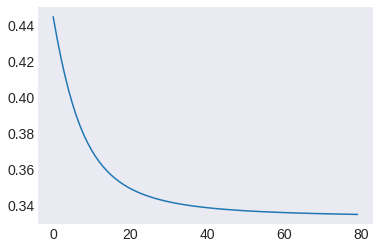

In [54]:
plt.plot(np.diag(b @ Hgs @ b.T))

In [46]:
np.count_nonzero(a) / a.size

0.007346938775510204

In [40]:
splin.eigsh(a[0], k=1, sigma=12)

(array([11.90216532]),
 array([[ 0.00799698],
        [-0.01509314],
        [ 0.00922785],
        ...,
        [-0.0011597 ],
        [-0.00433568],
        [ 0.00389084]]))